
# 📊 Understanding Likelihood and How It Differs from Probability

This notebook introduces the concept of **likelihood**, explains how it differs from **probability**, and provides Python code examples and visualizations to support intuitive understanding.

---

## 🔍 What is Likelihood?

In statistics, **likelihood** refers to the plausibility of a parameter value given observed data. It answers the question:

> **“Given the observed data, how likely is a particular parameter value?”**

We treat the data as fixed and view the parameter as a variable.

### 🧪 Example:

If we observed **7 heads in 10 coin tosses**, and we don't know the true probability \( p \), we ask:

> What value of \( p \) makes this data most likely?

The likelihood function:
$$
L(p) = p^7 (1 - p)^3
$$

The goal is to find the **Maximum Likelihood Estimate (MLE)** — the value of \( p \) that maximizes \( L(p) \).



## 📈 Likelihood in Python


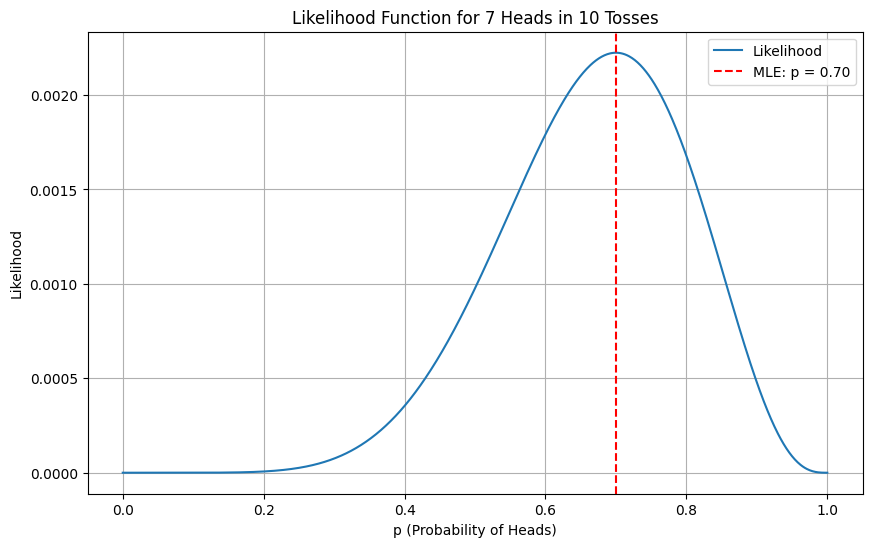

In [1]:

import numpy as np
import matplotlib.pyplot as plt

# Observed data: 7 heads in 10 tosses
n = 10
k = 7

# Parameter values to test
p = np.linspace(0, 1, 1000)
likelihood = (p ** k) * ((1 - p) ** (n - k))

# Find MLE
p_mle = p[np.argmax(likelihood)]

# Plot likelihood
plt.figure(figsize=(10, 6))
plt.plot(p, likelihood, label='Likelihood')
plt.axvline(p_mle, color='red', linestyle='--', label=f'MLE: p = {p_mle:.2f}')
plt.title('Likelihood Function for 7 Heads in 10 Tosses')
plt.xlabel('p (Probability of Heads)')
plt.ylabel('Likelihood')
plt.legend()
plt.grid(True)
plt.show()



---

## 🎯 How Likelihood Differs from Probability

|                | **Probability**                                                  | **Likelihood**                                                |
|----------------|------------------------------------------------------------------|---------------------------------------------------------------|
| What varies?   | The **data** varies; parameters are fixed                        | The **parameter** varies; data is fixed                       |
| Use case       | Used to **predict outcomes** given known parameters              | Used to **estimate parameters** from observed data            |
| Example        | “What’s the chance of 7 heads if \( p = 0.5 \)?”               | “Given 7 heads, what value of \( p \) makes this most likely?” |

### 🔁 Analogy:
> **Probability**: You know the machine, what’s the chance of this result?  
> **Likelihood**: You see the result, which machine likely made it?




## 🎲 Probability in Python

Let’s calculate the **probability** of getting 7 heads out of 10 tosses if we assume the coin is fair (p = 0.5).


In [2]:

from scipy.stats import binom

# Compute probability
prob_7_heads = binom.pmf(k, n, 0.5)
print(f"Probability of getting 7 heads out of 10 if p = 0.5: {prob_7_heads:.4f}")


Probability of getting 7 heads out of 10 if p = 0.5: 0.1172



---

## 🔢 What is Log-Likelihood?

The **log-likelihood** is simply the logarithm of the likelihood function. In logistic regression, where we're dealing with probabilities for binary outcomes, it is more numerically stable and easier to optimize than raw likelihood.

Given predicted probabilities \( \hat{y}_i \) and observed labels \( y_i \), the log-likelihood is:

$$
\log L(\beta) = \sum_{i=1}^{n} \left[ y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \right]
$$

---

### 🎯 Why Take the Log?

- It converts multiplication into addition (more numerically stable)
- Easier to differentiate for optimization (gradient ascent)
- Common practice in logistic regression and maximum likelihood estimation

We aim to **maximize the log-likelihood**, which is the same as maximizing the likelihood (since log is a monotonically increasing function).



## 🤖 Logistic Regression Using Log-Likelihood

Let's walk through an example of using log-likelihood to find the best parameters \( \beta_0 \) and \( \beta_1 \) for a simple logistic regression problem using gradient ascent.


In [3]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.special import expit  # Sigmoid function

# Sample data: binary classification
x = np.array([1, 2, 3, 4, 5, 6])
y = np.array([0, 0, 0, 1, 1, 1])

# Initialize parameters
beta0 = 0.0
beta1 = 0.0
learning_rate = 0.1
n_iter = 100

# Track progress
log_likelihood_history = []

# Gradient ascent
for _ in range(n_iter):
    z = beta0 + beta1 * x
    y_pred = expit(z)  # sigmoid
    log_likelihood = np.sum(y * np.log(y_pred + 1e-9) + (1 - y) * np.log(1 - y_pred + 1e-9))
    log_likelihood_history.append(log_likelihood)

    error = y - y_pred
    beta0 += learning_rate * np.sum(error)
    beta1 += learning_rate * np.sum(error * x)

print(f"Final parameters: beta0 = {beta0:.4f}, beta1 = {beta1:.4f}")


Final parameters: beta0 = -4.4472, beta1 = 1.3627


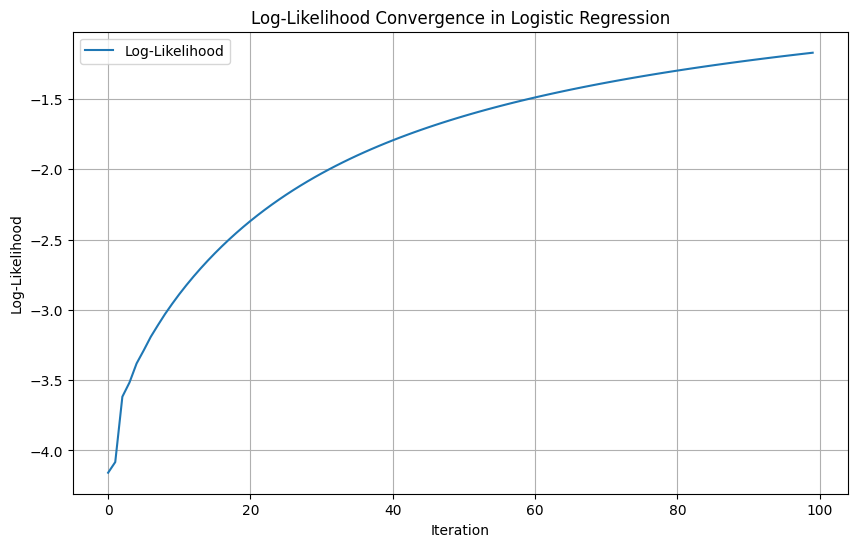

In [4]:

# Plot log-likelihood over iterations
plt.figure(figsize=(10, 6))
plt.plot(range(len(log_likelihood_history)), log_likelihood_history, label='Log-Likelihood')
plt.xlabel("Iteration")
plt.ylabel("Log-Likelihood")
plt.title("Log-Likelihood Convergence in Logistic Regression")
plt.grid(True)
plt.legend()
plt.show()
